O ideal é que, inicialmente, teste-se a depedência entre as variáveis.
Assim, garante-se que há relação entre as informações. 

In [7]:
import pandas as pd

data = {
    'Fruta': ['Maçã', 'Banana', 'Laranja', 'Maçã', 'Banana', 'Laranja', 'Maçã', 'Banana', 'Laranja'],
    'Grupo': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Preferência': [10, 20, 30, 15, 25, 35, 20, 30, 40]
}

df = pd.DataFrame(data)
print(df)


     Fruta Grupo  Preferência
0     Maçã     A           10
1   Banana     A           20
2  Laranja     A           30
3     Maçã     B           15
4   Banana     B           25
5  Laranja     B           35
6     Maçã     C           20
7   Banana     C           30
8  Laranja     C           40


In [8]:
#tabela de contingencia

contingency_table = pd.pivot_table(df, values='Preferência', index='Fruta', columns='Grupo', aggfunc='sum')
print(contingency_table)

Grupo     A   B   C
Fruta              
Banana   20  25  30
Laranja  30  35  40
Maçã     10  15  20


In [11]:
#analise de correspondencia
import numpy as np
from scipy.linalg import svd

#normalizar a tabela de contingência
contingency_table = contingency_table / contingency_table.sum().sum()

#calcular as marginais
row_marginals = contingency_table.sum(axis=1).values
col_marginals = contingency_table.sum(axis=0).values

#calcular a matriz de resíduos
expected = np.outer(row_marginals, col_marginals)
residuals = contingency_table.values - expected

#calcular a matriz de resíduos padronizados
standardized_residuals = residuals / np.sqrt(expected)

#decomposição em valores singulares
U, s, Vt = svd(standardized_residuals, full_matrices=False)

row_coords = U * s
col_coords = Vt.T * s

print("Coordenadas das linhas (frutas):")
print(row_coords)

print('')

print("Coordenadas das colunas (grupos):")
print(col_coords)


Coordenadas das linhas (frutas):
[[-3.95626112e-17  6.91663360e-17 -3.66239654e-18]
 [-3.25300024e-02  1.62392138e-17  1.09192592e-17]
 [ 4.96903995e-02  1.06310609e-17  7.14833313e-18]]

Coordenadas das colunas (grupos):
[[-4.60043706e-02 -3.77036339e-17 -4.78366515e-18]
 [ 0.00000000e+00 -4.00849541e-17  1.12487069e-17]
 [ 3.75624113e-02 -4.61773322e-17 -5.85876936e-18]]


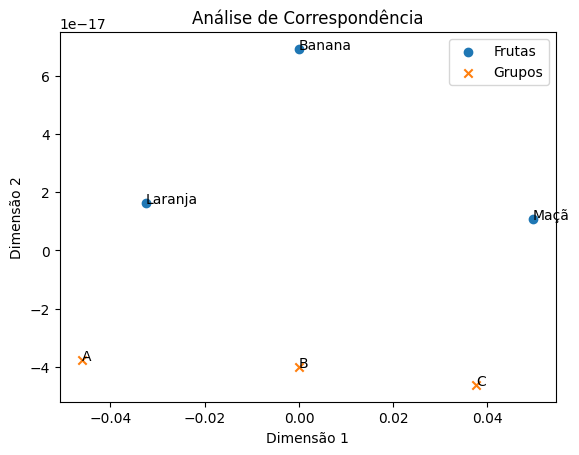

In [13]:
import matplotlib.pyplot as plt

plt.scatter(row_coords[:, 0], row_coords[:, 1], label='Frutas')
for i, txt in enumerate(contingency_table.index):
    plt.annotate(txt, (row_coords[i, 0], row_coords[i, 1]))

plt.scatter(col_coords[:, 0], col_coords[:, 1], label='Grupos', marker='x')
for i, txt in enumerate(contingency_table.columns):
    plt.annotate(txt, (col_coords[i, 0], col_coords[i, 1]))

plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.legend()
plt.title('Análise de Correspondência')
plt.show()


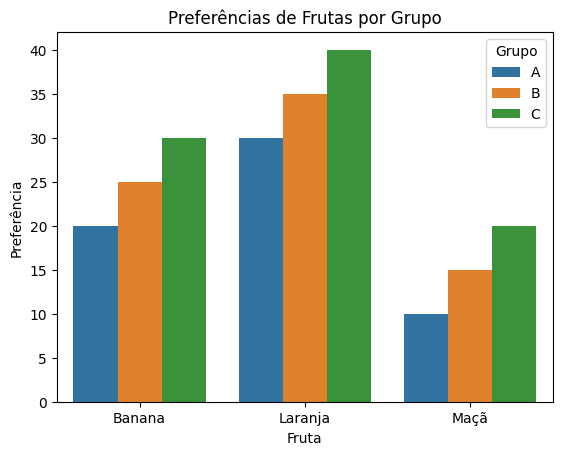

In [14]:
import seaborn as sns

df_long = df.pivot(index='Fruta', columns='Grupo', values='Preferência').reset_index().melt(id_vars='Fruta')

sns.barplot(x='Fruta', y='value', hue='Grupo', data=df_long)
plt.xlabel('Fruta')
plt.ylabel('Preferência')
plt.title('Preferências de Frutas por Grupo')
plt.show()


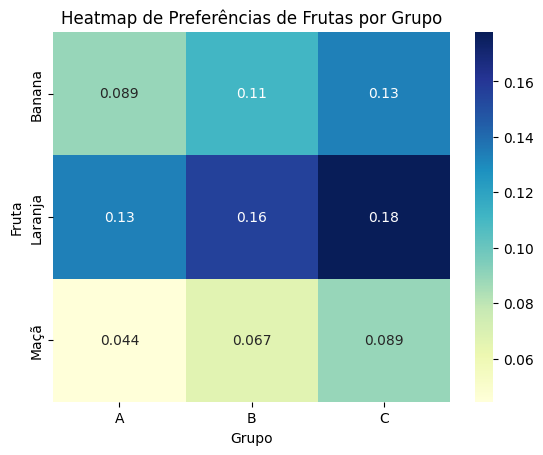

In [15]:
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.xlabel('Grupo')
plt.ylabel('Fruta')
plt.title('Heatmap de Preferências de Frutas por Grupo')
plt.show()

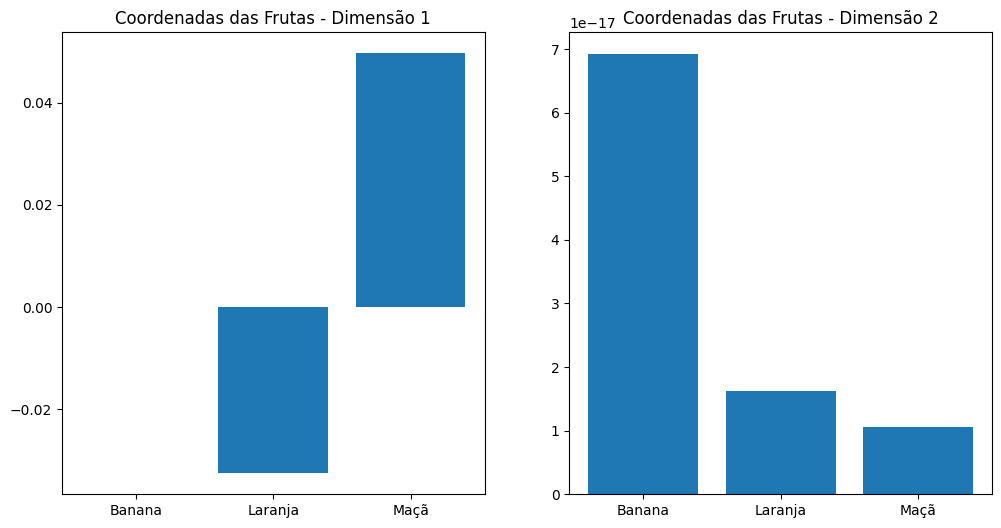

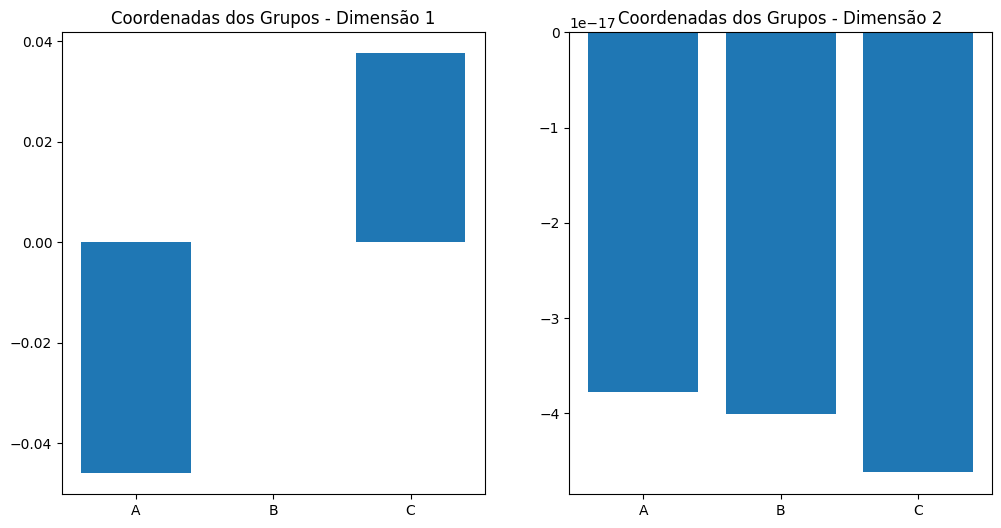

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(contingency_table.index, row_coords[:, 0])
ax[0].set_title('Coordenadas das Frutas - Dimensão 1')
ax[1].bar(contingency_table.index, row_coords[:, 1])
ax[1].set_title('Coordenadas das Frutas - Dimensão 2')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(contingency_table.columns, col_coords[:, 0])
ax[0].set_title('Coordenadas dos Grupos - Dimensão 1')
ax[1].bar(contingency_table.columns, col_coords[:, 1])
ax[1].set_title('Coordenadas dos Grupos - Dimensão 2')
plt.show()